# Project - 1: Analyzing Attributes of Popular Songs on Spotify

## The Data 
The dataset ["Most Streamed Spotify Songs 2023"](https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023) in this project is sourced from Kaggle and is by Nidula Elgiriyewithana. It provides detailed insights into the top streamed songs on Spotify. The dataset consists of 953 rows and 24 columns. The rows each represent a unique song, each with different features.

* track_name: Name of the song
* artist(s)_name: Name of the artist(s) of the song
* artist_count: Number of artists contributing to the song
* released_year: Year when the song was released
* released_month: Month when the song was released
* released_day: Day of the month when the song was released
* in_spotify_playlists: Number of Spotify playlists the song is included in
* in_spotify_charts: Presence and rank of the song on Spotify charts
* streams: Total number of streams on Spotify
* in_apple_playlists: Number of Apple Music playlists the song is included in
* in_apple_charts: Presence and rank of the song on Apple Music charts
* in_deezer_playlists: Number of Deezer playlists the song is included in
* in_deezer_charts: Presence and rank of the song on Deezer charts
* in_shazam_charts: Presence and rank of the song on Shazam charts
* bpm: Beats per minute, a measure of song tempo
* key: Key of the song
* mode: Mode of the song (major or minor)
* danceability_%: Percentage indicating how suitable the song is for dancing
* valence_%: Positivity of the song's musical content
* energy_%: Perceived energy level of the song
* acousticness_%: Amount of acoustic sound in the song
* instrumentalness_%: Amount of instrumental content in the song
* liveness_%: Presence of live performance elements
* speechiness_%: Amount of spoken words in the song

Features discriptions provided by the author of the dataset


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [17]:
# import csv as a df
spotify_df = pd.read_csv("spotify-2023.csv", sep=',', encoding='latin1') #for whatever reason the encoding is not utf-8 (https://stackoverflow.com/a/31492722 had a solution)
spotify_df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [18]:
# checking info
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

## Data Cleaning

In [19]:
#data checking for nulls
spotify_df.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

After checking, there were a few, but only in the columns I was going to filter out anyway, so I decided I didn't need to normalize the data in those subsets. I could move on to filtering the data for the desired subset of data, giving the resulting data looking like this.

In [20]:
# we are only interested in track_name, streams, bpm energy, acousticness, instrumentalness, and speechiness so null values in key and in shazam charts are not an issue
#filter the data we want
filter_spotify_df = spotify_df[['track_name', 'streams', 'bpm', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'speechiness_%']]
filter_spotify_df.head()

,track_name,streams,bpm,energy_%,acousticness_%,instrumentalness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),141381703,125,83,31,0,4
1,LALA,133716286,92,74,7,0,4
2,vampire,140003974,138,53,17,0,6
3,Cruel Summer,800840817,170,72,11,0,15
4,WHERE SHE GOES,303236322,144,80,14,63,6


In [21]:
#The last bit of pre-processing I want to do is normalizse the % by divding the values by 100 to get a range between 0-1, not needed but it cleans it up a bit for visualation later on I think
for col in ['energy_%','acousticness_%','instrumentalness_%','speechiness_%']:
    filter_spotify_df[col] = filter_spotify_df[col].div(100)

filter_spotify_df.head()

/var/folders/_3/thd1dk4d0fv4zfhvd3c3xfph0000gn/T/ipykernel_8947/1678921828.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_spotify_df[col] = filter_spotify_df[col].div(100)


,track_name,streams,bpm,energy_%,acousticness_%,instrumentalness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),141381703,125,0.83,0.31,0.00,0.04
1,LALA,133716286,92,0.74,0.07,0.00,0.04
2,vampire,140003974,138,0.53,0.17,0.00,0.06
3,Cruel Summer,800840817,170,0.72,0.11,0.00,0.15
4,WHERE SHE GOES,303236322,144,0.80,0.14,0.63,0.06


# Visualzation (The Fun Part)

Text(0.5, 0, 'Beats Per Minute')

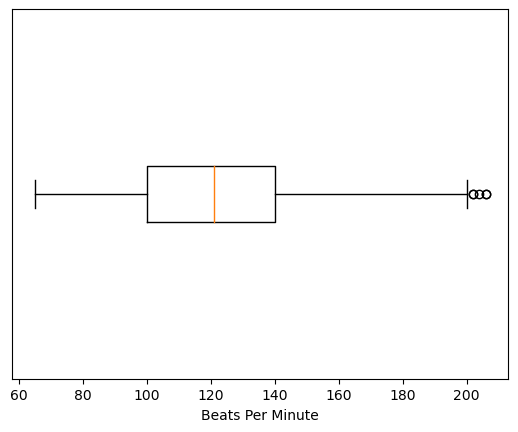

In [22]:
# data looks clean now we can do the fun part of anaylising it
#BPM
plt.boxplot(x=filter_spotify_df['bpm'],data=filter_spotify_df['bpm'], vert=False)
plt.yticks([])
plt.xlabel("Beats Per Minute")

Text(0.5, 0, 'Accousticness Percentage')

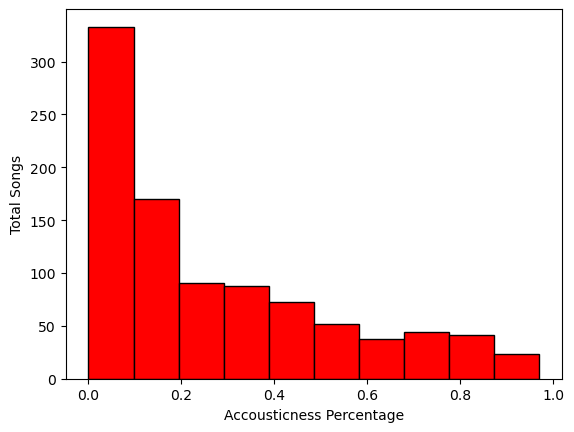

In [23]:
#of the total songs that are most popular where are the percentages of accoustiness vs instrumental
total_songs = len(filter_spotify_df['track_name'])

plt.hist(x=filter_spotify_df['acousticness_%'], color='Red', edgecolor='black', bins=10)
plt.ylabel("Total Songs")
plt.xlabel("Accousticness Percentage")

Text(0.5, 0, 'Instrumentalness Percentage')

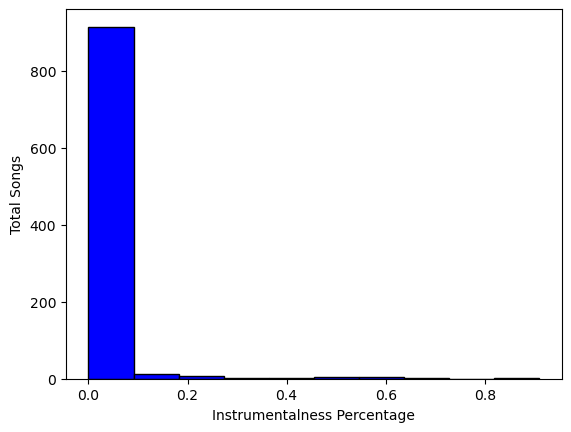

In [24]:
#what about for instrumental

plt.hist(x=filter_spotify_df['instrumentalness_%'], color='blue', edgecolor='black', bins=10) #huh, seems more accoustic leaning songs have a better chance at being popular
plt.ylabel("Total Songs")
plt.xlabel("Instrumentalness Percentage")

Text(0.5, 0, 'Instrumentalness Percentage')

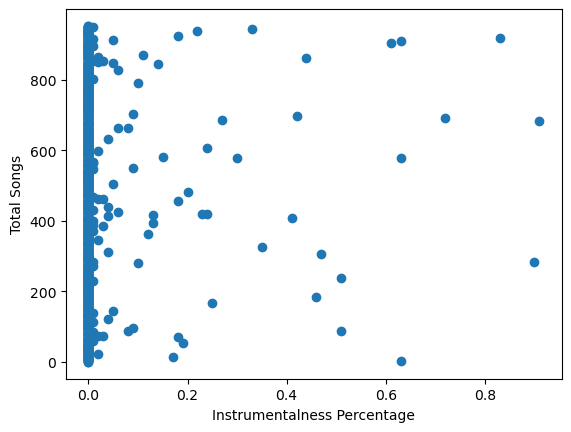

In [25]:

plt.scatter(x=filter_spotify_df['instrumentalness_%'], y=[x for x in range(total_songs)])
plt.ylabel("Total Songs")
plt.xlabel("Instrumentalness Percentage")

Text(0.5, 0, 'Speechiness Percentage')

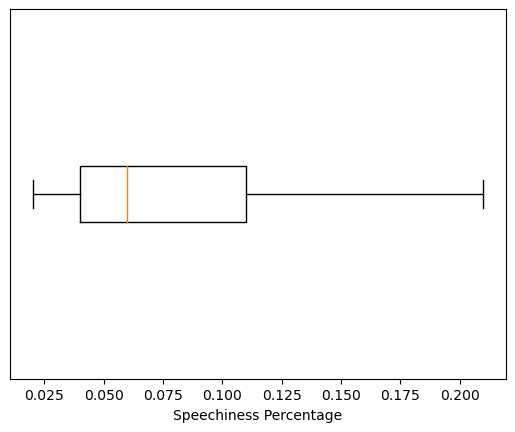

In [26]:
#what about the vocals of the songs how does that impact popularity 
plt.boxplot(x=filter_spotify_df['speechiness_%'],data=filter_spotify_df['speechiness_%'], vert=False, showfliers=False)
plt.yticks([])
plt.xlabel("Speechiness Percentage")

Text(0.5, 0, 'Perceived Energy Level Percentage')

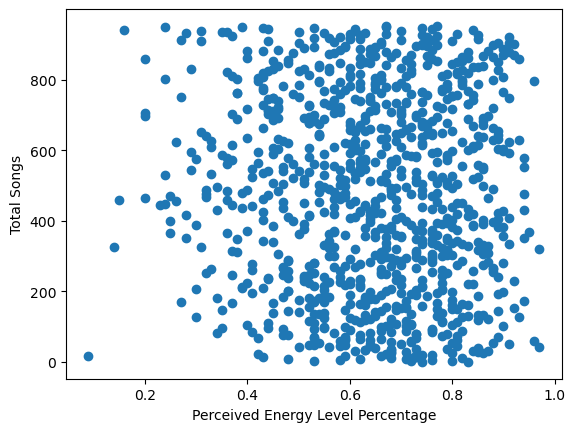

In [27]:
#What about percived energy the song gives
plt.scatter(x=filter_spotify_df['energy_%'], y=[x for x in range(total_songs)])
z = np.polyfit(x=filter_spotify_df['energy_%'], y=[x for x in range(total_songs)], deg=1)
p = np.poly1d(z)
plt.ylabel("Total Songs")
plt.xlabel("Perceived Energy Level Percentage")

Text(0.5, 0, 'Perceived Energy Level')

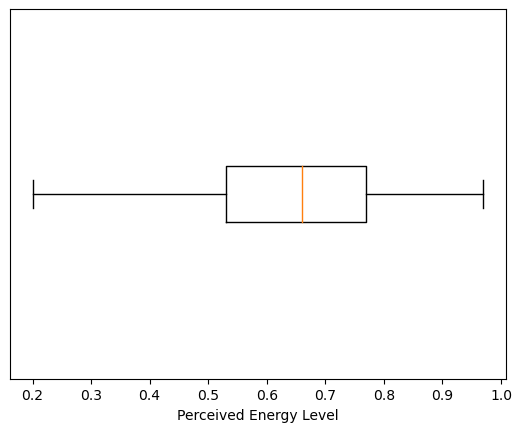

In [28]:
plt.boxplot(x=filter_spotify_df['energy_%'],data=filter_spotify_df['energy_%'], vert=False, showfliers=False)
plt.yticks([])
plt.xlabel("Perceived Energy Level")

Text(0.5, 0, 'Perveived Energy Level')

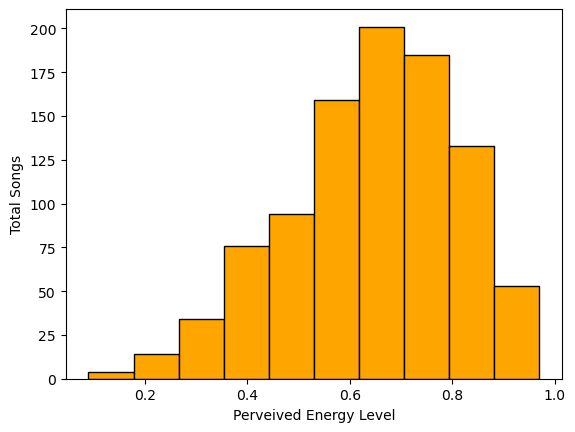

In [29]:
#This raises the question of is energy and bpm the most significant metric
plt.hist(x=filter_spotify_df['energy_%'], color='Orange', edgecolor='black', bins=10)
plt.ylabel("Total Songs")
plt.xlabel("Perveived Energy Level")
